# Analysis of Test Set 1
This notebook allows for the analysis and reproduction of the figures associated with the scientific publication of this work.
Upon running this notebook, the figures will be produced and saved under `figures`.

In [34]:
import glob
import math
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist as axisartist
from matplotlib.pyplot import *
from matplotlib import font_manager
from matplotlib.font_manager import FontProperties
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1 import host_subplot


 Define functions:

In [20]:
# Function to check if a value can be converted to a float.
def is_float(string: any) -> bool:
    if string is None:
        return False
    try:
        float(string)
        return True
    except ValueError:
        return False

# Function to extract all properties from an sdf file. (takes regex paths as input) 
def extract_properties_from_sdf(pathname):
    if not os.path.isfile(pathname):
        print("ERROR: file '%s' is missing!" % pathname)
        quit(1)
    pattern = re.compile("^> *<.*>$")
    all_values = {}
    with open(pathname, "r") as input_file:
        lines = input_file.readlines()
        for index, line in enumerate(lines):
            if pattern.match(line):
                property_name = re.split('<|>', line)[2]
                value_str = lines[index + 1].rstrip()
                if is_float(value_str):
                    all_values[property_name] = float(value_str)
                else:
                    all_values[property_name] = value_str
    return all_values

In [21]:
# Collect paths to all the sdf files of test set 1 in 'pathnames' variable.
pathnames = sorted(glob.glob('*/*_out.sdf'))
#print(pathnames)

In [25]:
# create dataframe with the descriptors, wights and fitness data.
mols = []
for mol in pathnames:
    if not extract_properties_from_sdf(mol)['NAME'] == 'H14' and not extract_properties_from_sdf(mol)['NAME'] == 'H15':
        mols.append(extract_properties_from_sdf(mol))
df = pd.DataFrame(mols)

#sort df by the values in 'FITNESS'
sorted_index_1 = df['FITNESS'].sort_values().index
df_sorted = df.loc[sorted_index_1]
df_sorted.set_index('NAME', inplace=True)

rows_descriptors=['DESCRIPTOR_1', 'DESCRIPTOR_2', 'DESCRIPTOR_3', 'FITNESS']
rows_weights=['WEIGHT_1', 'WEIGHT_2', 'WEIGHT_3', 'WEIGHT_4']
descriptors_df=df_sorted[rows_descriptors]
weights_df=df_sorted[rows_weights]

#print(descriptors_df)
#print(weights_df)

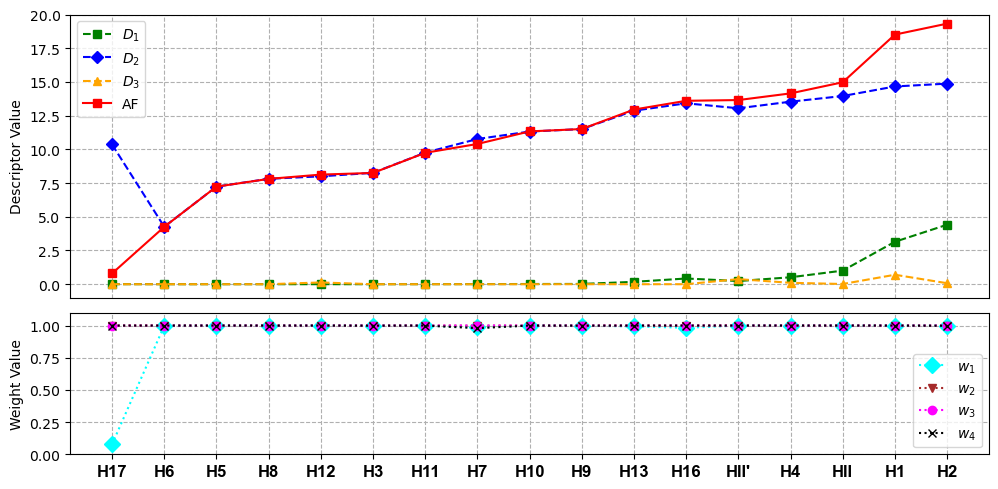

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Your existing data loading and preprocessing code here

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={'height_ratios': [2, 1]})

# Define the styles and legend names for the first subplot
descriptor_styles = {
    'DESCRIPTOR_1': {'color': 'green', 'linestyle': '--', 'marker': 's', 'legend': r'$D_{1}$'},
    'DESCRIPTOR_2': {'color': 'blue', 'linestyle': '--', 'marker': 'D', 'legend': r'$D_{2}$'},
    'DESCRIPTOR_3': {'color': 'orange', 'linestyle': '--', 'marker': '^', 'legend': r'$D_{3}$'},
    'FITNESS': {'color': 'red', 'linestyle': '-', 'marker': 's', 'legend': 'AF'}
}

# First subplot
for column in descriptors_df.columns:
    style = descriptor_styles.get(column, {'color': 'black', 'linestyle': '-', 'marker': 'o', 'legend': column})
    axs[0].plot(descriptors_df.index, descriptors_df[column], color=style['color'], linestyle=style['linestyle'], marker=style['marker'], label=style['legend'])
axs[0].set_xlabel('')
axs[0].set_ylabel('Descriptor Value')
axs[0].set_title('')
axs[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
axs[0].set_ylim(-1, 20)  # Set y-axis range
axs[0].legend()
axs[0].grid(True, linestyle='--')

# Define the styles and legend names for the second subplot
weight_styles = {
    'WEIGHT_1': {'color': 'cyan', 'linestyle': ':', 'marker': 'D', 'markersize': 8, 'legend': r'$w_{1}$'},
    'WEIGHT_2': {'color': 'brown', 'linestyle': ':', 'marker': 'v', 'legend': r'$w_{2}$'},
    'WEIGHT_3': {'color': 'magenta', 'linestyle': ':', 'marker': 'o', 'legend': r'$w_{3}$'},
    'WEIGHT_4': {'color': 'black', 'linestyle': ':', 'marker': 'x', 'legend': r'$w_{4}$'}
}

# Second subplot
for column in weights_df.columns:
    style = weight_styles.get(column, {'color': 'black', 'linestyle': '-', 'marker': 'o', 'legend': column})
    axs[1].plot(weights_df.index, weights_df[column], color=style['color'], linestyle=style['linestyle'], marker=style['marker'], markersize=style.get('markersize', 6), label=style['legend'])
axs[1].set_xlabel('')
axs[1].set_ylabel('Weight Value')
axs[1].set_title('')
axs[1].set_ylim(0, 1.1)  # Set y-axis range

# Set font properties for X-axis ticks
font_properties = font_manager.FontProperties(family='Arial', weight='bold', size=12)
for label in axs[1].get_xticklabels():
    label.set_fontproperties(font_properties)

axs[1].legend()
axs[1].grid(True, linestyle='--')

plt.tight_layout()
plt.show()
